In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Property_Stolen_Recovered1.csv')

In [3]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


<BarContainer object of 2449 artists>

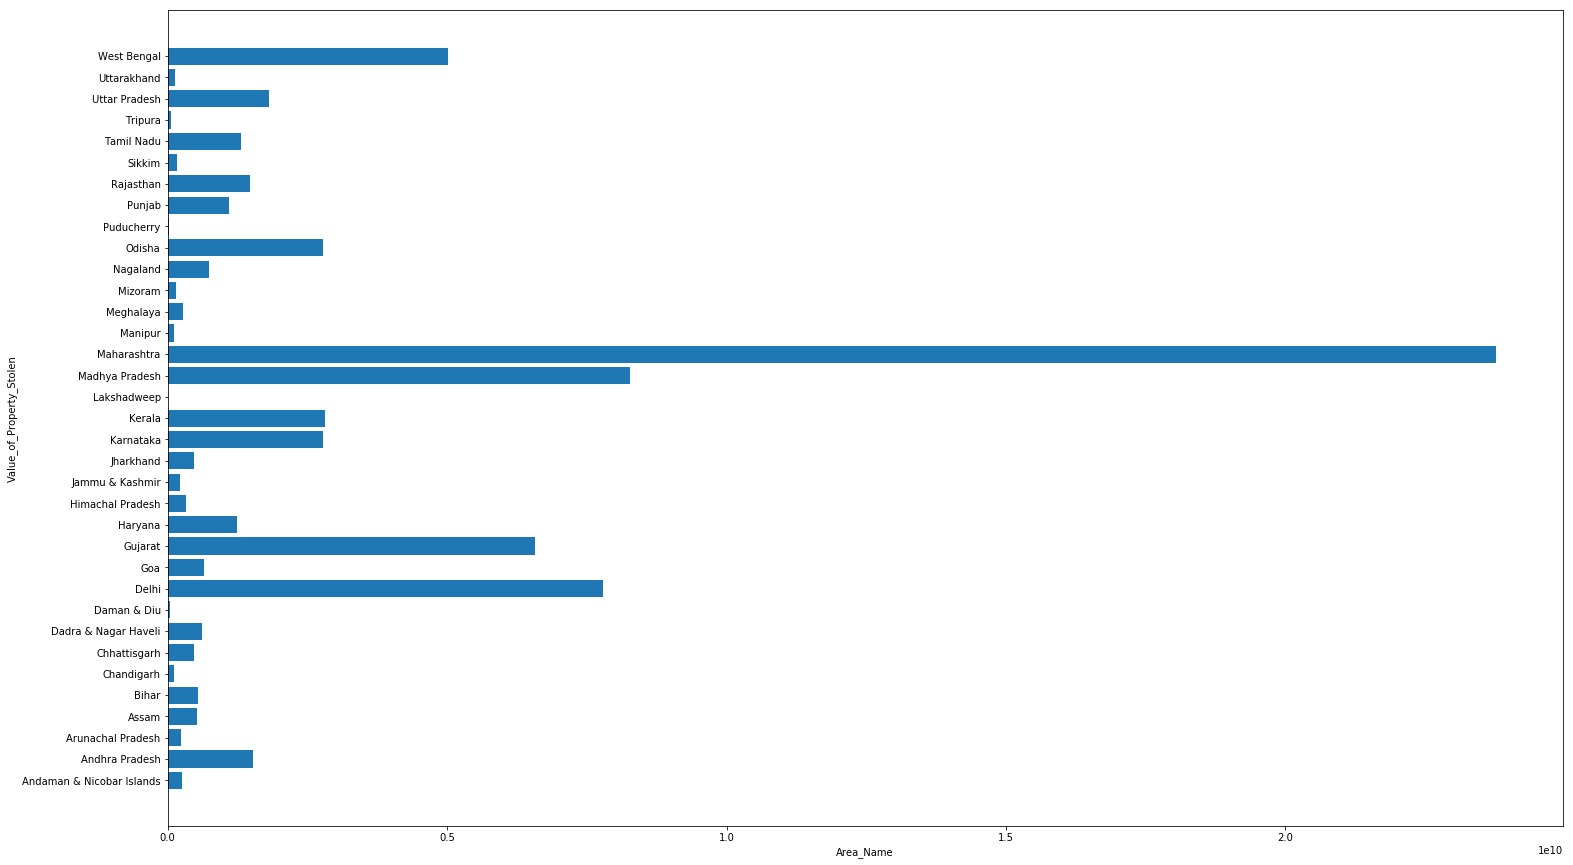

In [4]:
plt.figure(figsize = (25, 15)) 
plt.xlabel('Area_Name')
plt.ylabel('Value_of_Property_Stolen')
plt.barh(df['Area_Name'],df['Value_of_Property_Stolen'])

# -->Therefore we can observe that MAHARASHTRA is having highest Value_of_Property_Stolen among all other states.

# -->And states like TRIPURA,Pondicherry,Lakshadweep and Daman & Diu are having lowest Value_of_Property_Stolen among all other states

<BarContainer object of 2449 artists>

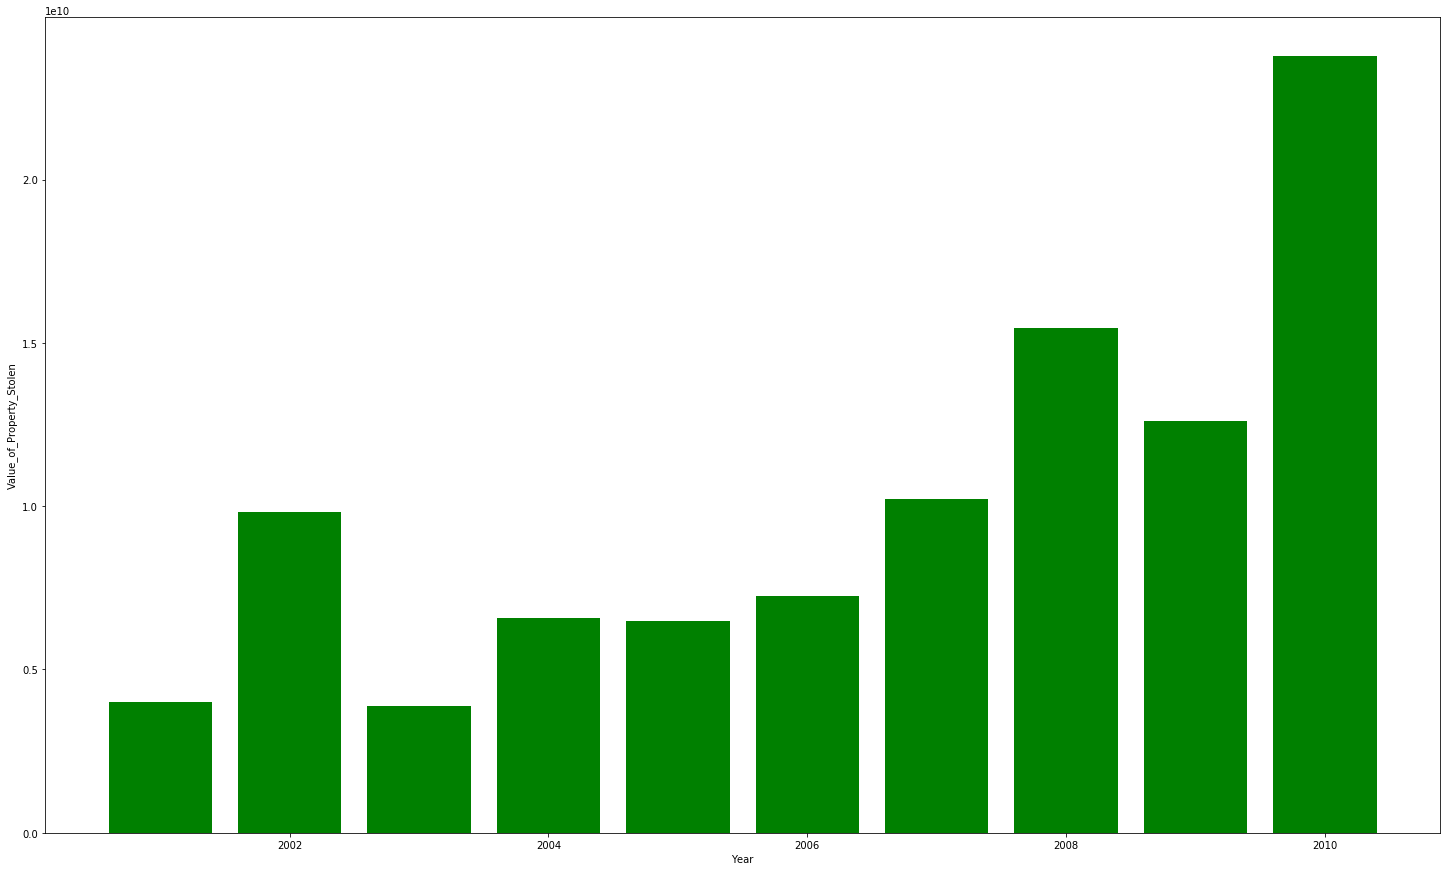

In [5]:
plt.figure(figsize = (25, 15)) 
plt.xlabel('Year')
plt.ylabel('Value_of_Property_Stolen')
plt.bar(df['Year'],df['Value_of_Property_Stolen'],color='g')

# -->The highest Value_of_Property_Stolen was in year 2010 and lowest Value_of_Property_Stolen was in year 2003.

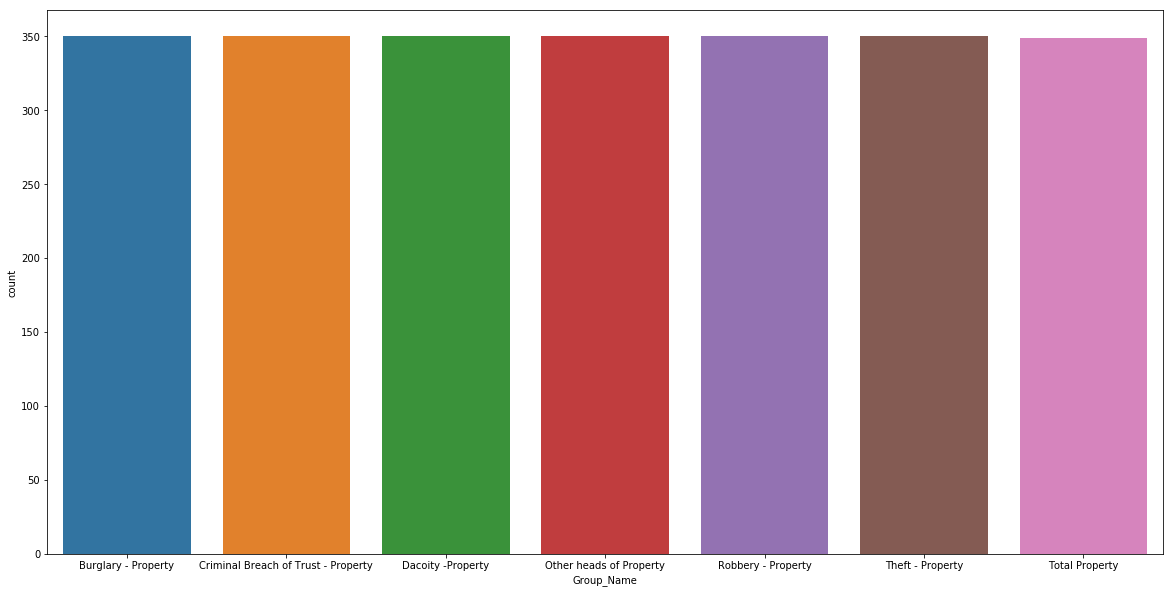

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x='Group_Name',data=df)

# -->We can see that all the Group_Names are almost equally distributed.

C:\Users\RK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


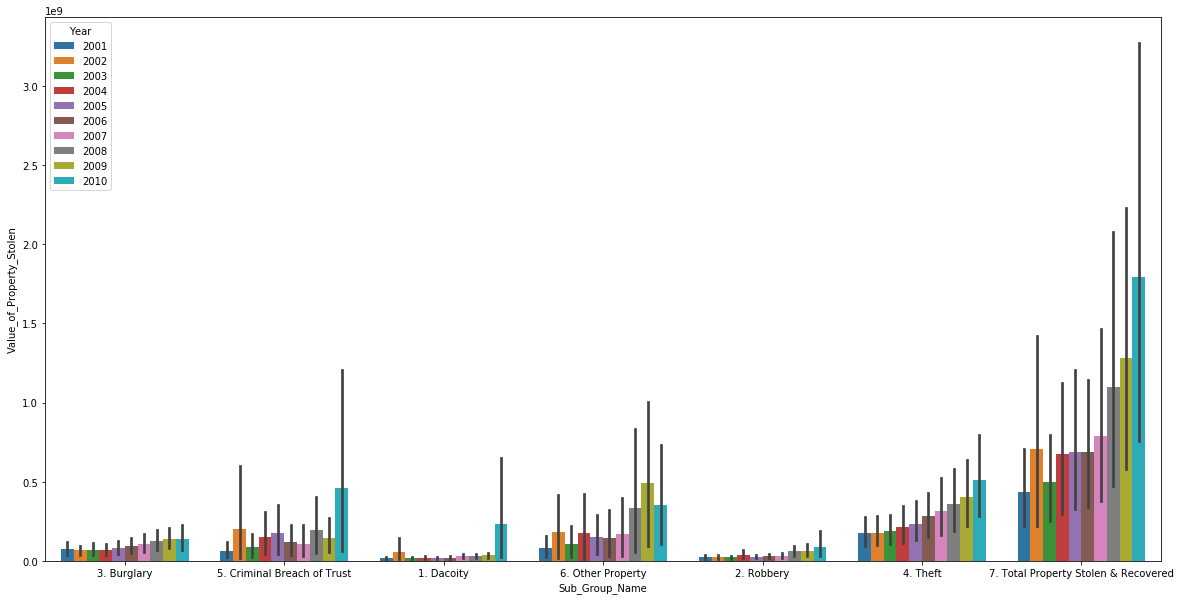

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(x='Sub_Group_Name',y='Value_of_Property_Stolen',hue='Year',data=df)

# -->Here we can see different Sub group names V/s Value of Property Stolen W.R.T Years.

# -->As we know highest value_of_property_stolen was in year 2010, therefore all different sub_group_names are having high value in the year 2010. 

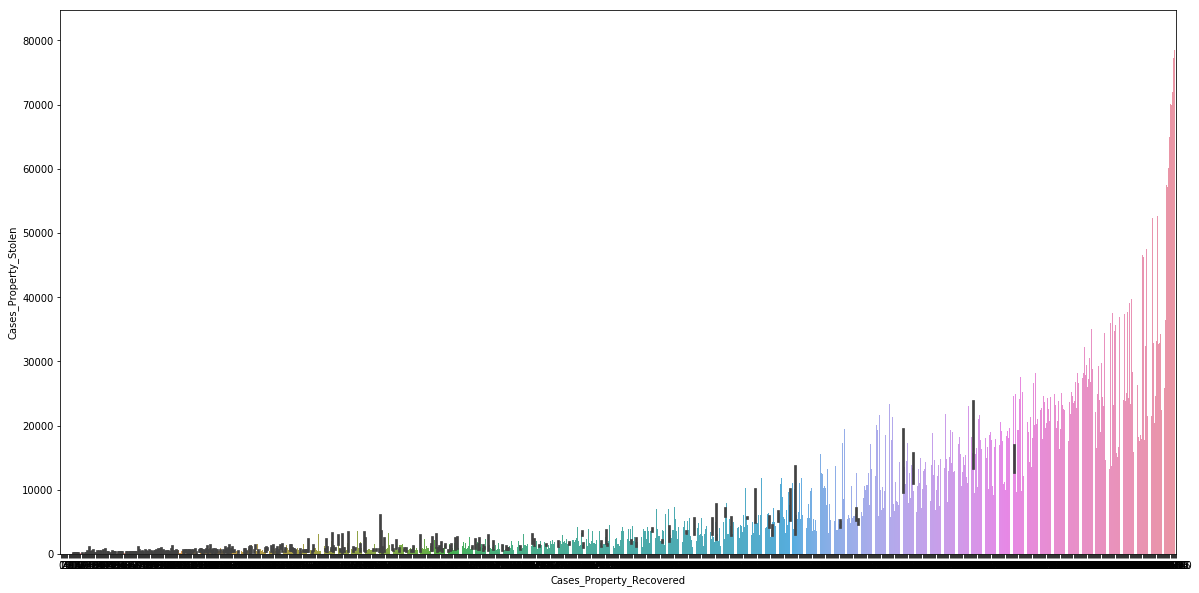

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cases_Property_Recovered',y='Cases_Property_Stolen',data=df)

# -->Here we can easy observe that as the no.of cases_property_recovered is increasing there is an exponential growth in no.of cases_property_stolen. 

In [9]:
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

# -->Here we don't have any NULL Values to remove.

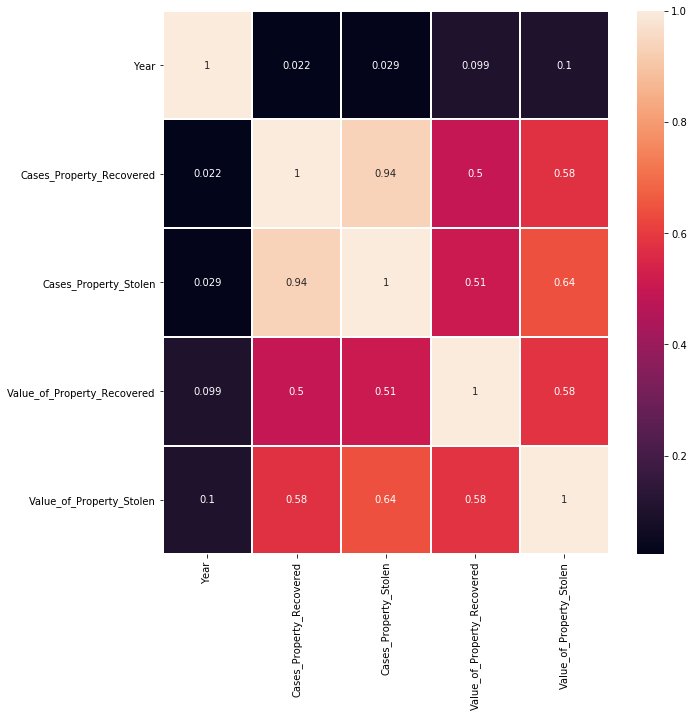

In [10]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,lw=1)

# -->Here we can observe that Value_of_property_stolen is having -ve correalation with the YEAR.(As we saw earlier highest Value_of_property_stolen was in 2010) And Value_of_property_stolen is having direct relation with no. of cases_property_stolen.

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Area_Name'] = le.fit_transform(df['Area_Name'])

In [12]:
df['Group_Name'] = le.fit_transform(df['Group_Name'])
df['Sub_Group_Name'] = le.fit_transform(df['Sub_Group_Name'])

In [13]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,0,2001,0,2,27,64,755858,1321961
1,1,2001,0,2,3321,7134,51483437,147019348
2,2,2001,0,2,66,248,825115,4931904
3,3,2001,0,2,539,2423,3722850,21466955
4,4,2001,0,2,367,3231,2327135,17023937


# We have converted the Categorical data into numerical data for further processing.

In [14]:
df.skew()

Area_Name                       0.000121
Year                            0.000582
Group_Name                      0.000459
Sub_Group_Name                  0.000459
Cases_Property_Recovered        4.180588
Cases_Property_Stolen           4.123731
Value_of_Property_Recovered    20.650682
Value_of_Property_Stolen       11.875169
dtype: float64

In [15]:
from scipy.stats import boxcox

In [16]:
list=['Cases_Property_Recovered','Cases_Property_Stolen','Value_of_Property_Recovered','Value_of_Property_Stolen']
for i in list:
    df[i].replace(0,df[i].mean(axis=0),inplace=True)

In [17]:
for i in list:
    df[i],l=boxcox(df[i])

In [18]:
df.skew()

Area_Name                      0.000121
Year                           0.000582
Group_Name                     0.000459
Sub_Group_Name                 0.000459
Cases_Property_Recovered      -0.031611
Cases_Property_Stolen         -0.025426
Value_of_Property_Recovered   -0.027843
Value_of_Property_Stolen      -0.006422
dtype: float64

# -->Hence, we have successfully removed skewness from our data.

In [19]:
# Now we will check for outlier and remove them.
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.68287021, 1.56625315, 1.49977059, ..., 0.74713746, 0.94462875,
        1.17753549],
       [1.58387547, 1.56625315, 1.49977059, ..., 1.18175918, 0.73402724,
        0.63396682],
       [1.48488073, 1.56625315, 1.49977059, ..., 0.23370125, 0.91640229,
        0.73863269],
       ...,
       [1.48496157, 1.56667957, 1.50099589, ..., 1.93050846, 2.06168369,
        1.79338552],
       [1.58395632, 1.56667957, 1.50099589, ..., 0.66837277, 0.6913119 ,
        0.55356878],
       [1.68295106, 1.56667957, 1.50099589, ..., 1.74250964, 2.51195862,
        2.52217711]])

In [20]:
threshold=3
print(np.where(z>3))

(array([ 685, 1034, 2364, 2399, 2433, 2434], dtype=int64), array([7, 6, 7, 7, 6, 7], dtype=int64))


# -->we are having 6 outliers in our dataset.

In [21]:
df_new=df[(z<3).all(axis=1)]

In [22]:
print(df.shape)
print(df_new.shape)

(2449, 8)
(2443, 8)


# Therefore we have removed 6 rows from our dataset

In [23]:
df=df_new 

# MODEL TRAINING

In [24]:
df_x=df.iloc[:,0:-1]

In [25]:
df_x.shape

(2443, 7)

In [26]:
y=df.iloc[:,-1]

In [27]:
y.shape

(2443,)

In [28]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [30]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (1710, 7)
y_train: (1710,)
x_test: (733, 7)
y_test: (733,)


In [31]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

# -->SELECTING ALGORITHM for our MODEL

In [32]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),KNeighborsRegressor(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('**********************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is:
Score: [0.70885765 0.78611709 0.82299684 0.88167865]
Mean Score: 0.799912554905162
standard deviation: 0.0626495970543313
**********************************************************************************************************




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is:
Score: [0.7248076  0.73166149 0.79860846 0.32735267]
Mean Score: 0.6456075577155849
standard deviation: 0.18599285946197433
**********************************************************************************************************


Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is:
Score: [0.69463917 0.76289271 0.78231893 0.78029632]
Mean Score: 0.7550367832411075
standard deviation: 0.035678938168742125
**********************************************************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) is:
Score: [0.70870965 0.78586023 0.82302766 

# Therefore we will use Linear Regression as it is having highest mean score.

In [33]:
from sklearn.model_selection import GridSearchCV
Lm=LinearRegression()
parameters={'n_jobs':[1,3,5,7,9,11,13,15]}
clf=GridSearchCV(Lm,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_jobs': 1}

In [34]:
Lm=LinearRegression(n_jobs=1)

In [35]:
Lm.fit(x_train,y_train)
Lm.score(x_train,y_train)

0.8587101271194153

In [36]:
pred=Lm.predict(x_test)

In [37]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Square error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Mean Absolute error: 2.53797403458561
Mean Square error: 14.064221876639301
R2 Score: 0.855978323668461


# Saving the Best Model

In [38]:
from sklearn.externals import joblib
joblib.dump(Lm,'Property_Stolen_Recovered1.pkl')

['Property_Stolen_Recovered1.pkl']